# Kimbail The Data Warehouse Tool kit

## Chapter 1

### Goals of Data Warehousing and Business Intelligence
- a data warehouse must be simple to understand its labels and structure. obvious to the business user, mimicking the business terminology.  
- accessible and easy to interact with, and provide numerous way to display data.
- provide fast query performance.
- its data quality must be insured and only deployed when it is validated.
- its data must be consistent from all sources.
- the warehouse should handle changes, new data, new application, and new business requirements without affecting the data warehouse operations.
- fast to deliver raw data to operation business users
- the warehouse must control access to the data to protect the business data
- the data warehouse must be accepted by the business users (if the solution doesn't improve the business user workflow it wont be used)

### DW/BI Managers Responsibilities

- Understand the business users:
    - Understand their job responsibilities, goals, and objectives.
    - Determine the decisions that the business users want to make with the
    help of the DW/BI system.
    - Identify the “best” users who make effective, high-impact decisions.
    - Find potential new users and make them aware of the DW/BI system’s
    capabilities.

</b>

- Deliver high-quality, relevant, and accessible information and analytics to
the business users:
    - Choose the most robust, actionable data to present in the DW/BI system,
    carefully selected from the vast universe of possible data sources
    in your organization.
    - Make the user interfaces and applications simple and template-driven,
    explicitly matched to the users’ cognitive processing profiles.
    - Make sure the data is accurate and can be trusted, labeling it consistently
    across the enterprise.
    - Continuously monitor the accuracy of the data and analyses.
    - Adapt to changing user profiles, requirements, and business priorities,
    along with the availability of new data sources.

</b>

- Sustain the DW/BI environment:
    - Take a portion of the credit for the business decisions made using the
    DW/BI system, and use these successes to justify staffing and ongoing
    expenditures.
    - Update the DW/BI system on a regular basis.
    - Maintain the business users’ trust.
    - Keep the business users, executive sponsors, and IT management
    happy.

### Dimensional modelling

dimensional addresses __delivering data that is understandable to business users__ and __delivering fast query performance__ data warehousing goals.

3NF models:
3NF models are used in operational databases and are beneficial since the normalized tables eliminate redundancy and insert update data in one place. however, normalized models are to complicated for analytical queries, users cant understand or navigate complex normalized models, and databases process complex joins slowly.

OLAP cubes:
- OLAP cubes (dimensional database) preform queries faster than the star schema (Relational database) due to indexing and preloaded summery tables, however, it can handle larger datasets.
- its difficult to port bi applications between different vendors since the data structure is not standardized between vendors
- unlike RDMS OLAP cubes have more capabilities since its not constrained by SQL

### Fact Tables for Measurements

for a retail store selling products where each row in a fact table represent a measurement event(transaction):
- all measurement should be the same level of detail such as row per product, ensuring measurements aren't duplicated.
- the idea that a measurement event has a one to one relationship to a single row in the corresponding fact table is the bedrock of 
- The most useful facts are numeric and additive, such as dollar sales amount.the most useful thing to do with so many rows is to add them up You will see that facts are sometimes semi-additive or even non-additive.
    - Semi-additive facts, such as account balances, cannot be summed across the time dimension. 
    - Non-additive facts, such as unit prices, can never be added. You are forced to use counts and averages or are reduced to printing out the fact rows one at a time, an impractical exercise with a billion-row fact table.
- You should not store redundant textual information in fact tables. Unless the text is unique for every row in the fact table (its rare to use textual data in the fact table, especially since it takes more space and is harder to analyze)
- the primary key of a fact table is usually a composite key made of a subset of the foreign keys
- its important not to fill the fact table with zeros for no activity, this could overwhelm the fact table
- example fact table:

|Retail Sales Facts|
|------------------|
|Date Key (FK)|
|Product Key (FK)|
|Store Key (FK)|
|Promotion Key (FK)|
|Customer Key (FK)|
|Clerk Key (FK)|
|Transaction #|
|Sales Dollars|
|Sales Units|

### Dimensional tables
- They describe the “who, what, where, when, how, and why” associated with the event.
- It is not uncommon for a dimension table to have 50 to 100 attributes; however, they tend to have fewer rows than the fact table
- Dimension attributes serve as the primary source of query constraints, groupings,and report labels.
- Attributes should consist of real words rather than codes. (unless having legitimate business significance)
- When sorting operational source data, it is sometimes unclear whether a numeric data element is a fact or dimension attribute. You often make the decision by asking whether the column is a measurement that takes on lots of values and participates in calculations (making it a fact) or is a discretely valued description that is more or less constant and participates in constraints and row labels (making it a dimensional attribute). For example, the standard cost for a product seems like a constant attribute of the product but may be changed so often that you decide it is more like a measured fact. Occasionally, you can’t be certain of the classification; it is possible to model the data element either way (or both ways) as a matter of the designer’s prerogative.
- You should almost always trade off dimension table space for simplicity and accessibility. (avoid normalizing redundant hierarchies like Category> brand> product into lookup tables and prioritize simplicity and performance over storage efficiency  )
- example dimension table:

|Product Dimension|
|-----------------|
|Product Key (PK)|
|SKU Number (Natural Key)|
|Product Description|
|Brand Name|
|Category Name|
|Department Name|
|Package Type|
|Package Size|
|Abrasive Indicator|
|Weight|
|Weight Unit of Measure|
|Storage Type|
|Shelf Life Type|
|Shelf Width|
|Shelf Height|
|Shelf Depth|


### Extract, Transformation, and Load System

- Extracting means reading and understanding the source data and copying the data needed into the ETL system for further manipulation.
- there are numerous potential transformations, such as cleansing the data (correcting misspellings, resolving domain conflicts, dealing with missing elements, or parsing into standard formats), combining data from multiple sources, and de-duplicating data.
    - these activities can be architected to create diagnostic metadata, eventually leading to business process re-engineering to improve data quality in the source systems over time.
- The final step of the ETL process is the physical structuring and loading of data into the presentation area’s target dimensional models. Because the primary mission of the ETL system is to hand off the dimension and fact tables in the delivery step, these subsystems are critical. Many of these defined subsystems focus on dimension table processing, such as surrogate key assignments, code lookups to provide appropriate descriptions, splitting, or combining columns to present the appropriate data values, or joining underlying third normal form table structures into flattened de-normalized dimensions. In contrast, fact tables are typically large and time consuming to load, but preparing them for the presentation area is typically straightforward. When the dimension and fact tables in a dimensional model have been updated, indexed, supplied with appropriate aggregates, and further quality assured, the business community is notified that the new data has been published.
- The ETL system is typically dominated by the simple activities of sorting and sequential processing. In many cases, the ETL system is not based on relational technology but instead may rely on a system of flat files. (it might be pointless to build a 3NF database just before de-normalizing it for the warehouse)

Presentation Area to Support Business Intelligence

in our opinion
- it is completely unacceptable to store only summary data in dimensional models, while the atomic data is locked up in normalized models. BI users may be interested in last week’s orders for products of a given size (or flavor, package type, or manufacturer) for customers who first purchased within 6 month for example 
- The presentation data area should be structured around business process measurement events. This approach naturally aligns with the operational source data capture systems. Dimensional models should correspond to physical data capture events; they should not be designed to deliver the report-of-the-day.
- Data in the queryable presentation area of the DW/BI system must be dimensional, atomic (complemented by performance-enhancing aggregates), business process-centric, and adhere to the enterprise data warehouse bus architecture. The data must not be structured according to individual departments’ interpretation of the data.

### Architectures 

__The Kimball Architecture:__
- Sources > ETL > Star schema structure > analytical tools
    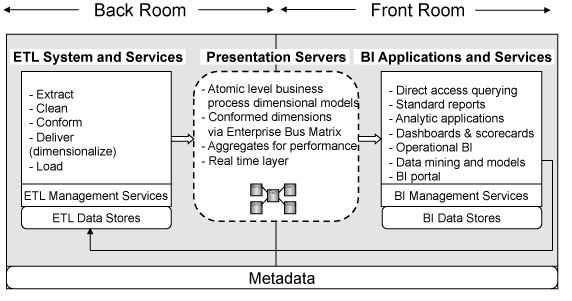

#### Alternative Architecture:

__Independent Data Mart Architecture:__
- sources> isolated data marts> analytical tools
- since every department design its own data mart when comparing analysis results between departments the data don't match
- this Architecture is prevalent, because it fast and the easiest to implement and require no cross organization collaboration 
- multiple uncoordinated extracts from the same operational sources and redundant storage of analytic data are inefficient and wasteful in the long run.  

    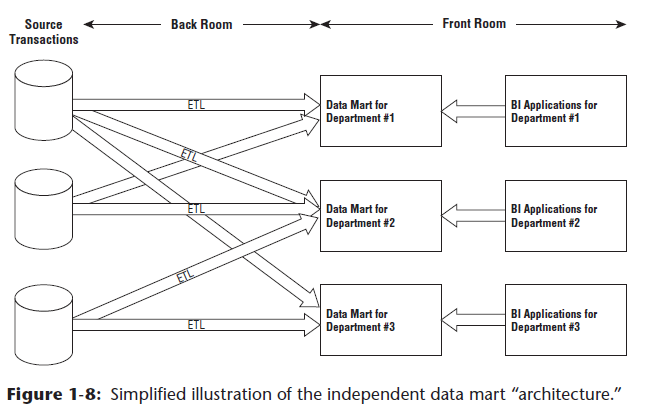

__Hub and Spoke Architecture:__
- With the CIF, data is extracted from the operational source systems and processed through an ETL system sometimes referred to as data acquisition. The atomic data that results from this processing lands in a 3NF database; this normalized, atomic repository is referred to as the Enterprise Data Warehouse (EDW) within the CIF architecture. Although the Kimball architecture enables optional normalization to support ETL processing, the normalized EDW is a mandatory construct in the CIF. Like the Kimball approach, the CIF advocates enterprise data coordination and integration. The CIF says the normalized EDW fills this role, whereas the Kimball architecture stresses the importance of an enterprise bus with conformed dimensions.
- Organizations who have adopted the CIF approach often have business users accessing the EDW repository due to its level of detail or data availability timeliness.
- the resultant analytic databases typically diff er from structures in the Kimball architecture’s presentation area in that they’re frequently departmentally-centric (rather than organized around business processes) and populated with aggregated data (rather than atomic details). If the data delivery ETL processes apply business rules beyond basic summarization, such as departmental renaming of columns or alternative calculations, it may be difficult to tie these analytic databases to the EDW’s atomic repository.
- The most extreme form of a pure CIF architecture is unworkable as a data warehouse, in our opinion. Such an architecture locks the atomic data in difficult to query normalized structures, while delivering departmentally incompatible data marts to different groups of business users. But before being too depressed by this view, stay tuned for the next section.
    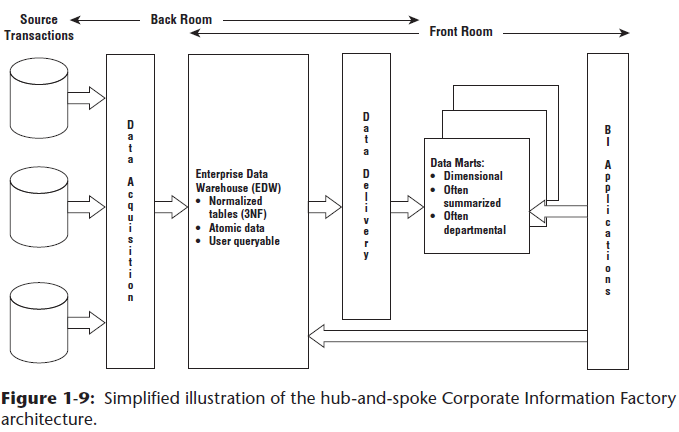

__Hybrid Hub and Spoke and Kimball Architecture:__
- The final architecture warranting discussion is the marriage of the Kimball and Inmon CIF architectures. As illustrated in Figure 1-10, this architecture populates a CIF-centric EDW that is completely off -limits to business users for analysis and reporting. It’s merely the source to populate a Kimball-esque presentation area in which the data is dimensional, atomic (complemented by aggregates), process-centric, and conforms to the enterprise data warehouse bus architecture.
- It may leverage a preexisting investment in an integrated repository, while addressing the performance and usability issues associated with the 3NF EDW by offloading queries to the dimensional presentation area.
- If you’ve already invested in the creation of a 3NF EDW, but it’s not delivering on the users’ expectations of fast and flexible reporting and analysis, this hybrid approach might be appropriate for your organization. If you’re starting with a blank sheet of paper, the hybrid approach will likely cost more time and money, both during development and ongoing operation, given the multiple movements of data and redundant storage of atomic details. If you have the appetite, the perceived need, and perhaps most important, the budget and organizational patience to fully normalize and instantiate your data before loading it into dimensional structures that are well designed according to the Kimball methods, go for it.
    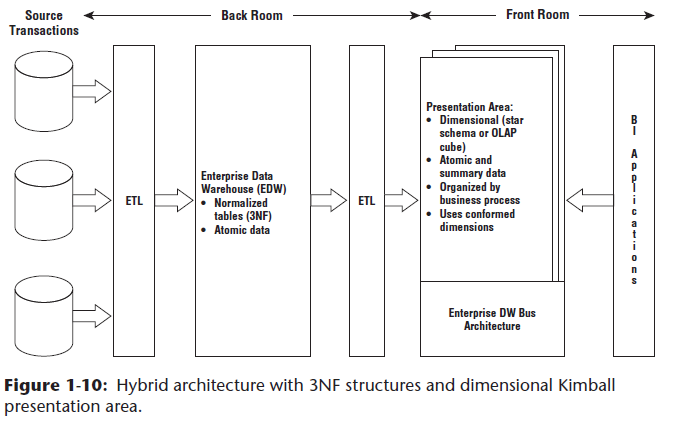

Common misconceptions in the industry:

- Dimensional Models are Only for Summary Data: 
    - data should be stored at the most atomic level to provide answer to any ad hoc questions. while summery data should be used to improve performance for commonly asked questions.

</b>

- Dimensional Models are Departmental, Not Enterprise: 
    - Rather than drawing boundaries based on organizational departments, dimensional models should be organized around business processes, such as orders, invoices, and service calls. Multiple business functions often want to analyze the same metrics resulting from a single business process. Multiple extracts of the same source data that create multiple, inconsistent analytic databases should be avoided.

</b>

- Dimensional Models are Not Scalable: 
    - Dimensional models are extremely scalable. Fact tables frequently have billions of rows; fact tables containing 2 trillion rows have been reported.

</b>

- Dimensional Models are Only for Predictable Usage: 
    - Dimensional models should not be designed by focusing on predefined reports or analyses; the design should center on measurement processes. Obviously, it’s important to consider the BI application’s filtering and labeling requirements. 

</b>

- Dimensional models aren’t responsive to changing business needs: 
    - because of their symmetry, dimensional structures are extremely flexible and adaptive to change. The secret to query flexibility is building fact tables at the most granular  level. Dimensional models that deliver only summary data are bound to be problematic; users run into analytic brick walls when they try to drill down into details not available in the summary tables. Developers also run into brick walls because they can’t easily accommodate new dimensions, attributes,or facts with these prematurely summarized tables.    

</b>

- Dimensional Models Can’t Be Integrated:
    - Dimensional models most certainly can be integrated if they conform to the enterprise data warehouse bus architecture. Conformed dimensions are built and maintained as centralized, persistent master data in the ETL system and then reused across dimensional models to enable data integration and ensure semantic consistency. Data integration depends on standardized labels, values, and definitions. It is hard work to reach organizational consensus and then implement the corresponding ETL rules, but you can’t dodge the eff ort, regardless of whether you’re populating normalized or dimensional models.